## Libraries

In [1]:
#!pip install keras
#!pip install tensorflow

In [2]:
import pandas as pd
import numpy as np
import requests

from numpy import mean
from numpy import std
from numpy import absolute

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet

from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import mean_absolute_percentage_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import grangercausalitytests
from sklearn.metrics import mean_squared_error
from scipy import signal

## Datos

In [ ]:
#Yearly
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['PM05319BA','PM05346BA','PM10188FA','PM10197FA','PM10189FA']
form_out  = '/json'
period    = '/2003/2020'

month_s = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Set','Oct','Nov','Dic']
month_d = ['01','02','03','04','05','06','07','08','09','10','11','12']

df_anual = pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']
    
    value = []
    dates = []
    
    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(float(aux_val[0]))
    
    dict_aux = {'Fecha' : dates, 
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
    for (s,d) in zip(month_s,month_d):
        df_aux['Fecha'] = df_aux['Fecha'].str.replace(s,d)
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])

    
    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df_anual    = pd.concat([df_anual, df_aux], axis=1)


df_anual = df_anual.resample('M',loffset='MS').mean()
df_anual.fillna(method='ffill', inplace=True)
df_anual.drop(df_anual.tail(2).index,inplace=True)
display(df_anual)

In [4]:
#Daily
url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['PD04692MD', 'PD04692MD','PD38026MD', 'PD04709XD', 'PD04708XD', 'PD04637PD', 'PD04719XD', 'PD04718XD', 'PD04705XD', 'PD04701XD', 'PD04702XD', 'PD04703XD', 'PD04704XD']
form_out  = '/json'
period    = '/2002-12-31/2020-01-31'

month_s = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Set','Oct','Nov','Dic']
month_d = ['01','02','03','04','05','06','07','08','09','10','11','12']

df_diaria = pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']
    
    value = []
    dates = []
    
    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(float(aux_val[0]))
    
    dict_aux = {'Fecha' : dates, 
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
    for (s,d) in zip(month_s,month_d):
        df_aux['Fecha'] = df_aux['Fecha'].str.replace(s,d)
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])

    
    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df_diaria    = pd.concat([df_diaria, df_aux], axis=1)


df_diaria = df_diaria.resample('M',loffset='MS').mean()
display(df_diaria)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9148\3409967171.py:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9148\3409967171.py:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9148\3409967171.py:31: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
C:\Users\Usuario

,"Tasas de interés - Interbancaria, S/","Tasas de interés - Interbancaria, S/",Indicadores bursátiles - Índice General Bursátil BVL (índice),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG Perú (pbs),Tasas de interés: EMBIG (variación en pbs) - Spread - EMBIG America Latina (pbs),Tipo de cambio - TC Interbancario (S/ por US$) - Compra,Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 10 años (%),Tasas de interés internacionales - Bonos del Tesoro EE.UU. - 5 años (%),"Cotizaciones internacionales - Petróleo (West Texas Intermediate, US$ por barriles)","Cotizaciones internacionales - Cobre (Londres, cUS$ por libras)","Cotizaciones internacionales - Plata (H.Harman, US$ por onzas troy)","Cotizaciones internacionales - Zinc (Londres, cUS$ por libras)","Cotizaciones internacionales - Oro (Londres, US$ por onzas troy)"
Fecha,,,,,,,,,,,,,
2003-01-01,3.560000,3.560000,NaN,609.000000,981.000000,3.512300,3.816000,2.736000,31.200000,69.671788,4.790000,33.996748,344.800000
2003-02-01,3.637826,3.637826,NaN,530.304348,863.956522,3.486987,3.988000,2.927682,32.373000,76.973594,4.868750,36.248217,361.089545
2003-03-01,3.604500,3.604500,NaN,499.600000,841.750000,3.480640,3.905500,2.855800,33.788421,76.870295,4.735263,35.895032,355.060000
2003-04-01,3.625217,3.625217,NaN,468.739130,779.130435,3.479822,3.949609,2.905217,31.097391,77.345391,4.638913,36.456004,347.030435
2003-05-01,3.651364,3.651364,NaN,433.500000,711.500000,3.468270,3.963182,2.901727,29.314000,76.462061,4.703250,35.892768,344.504762
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-01,2.250000,2.250000,20568.39,113.000000,354.000000,3.322000,1.810000,1.607000,63.270000,277.349057,18.119000,105.891139,1573.100000
2020-08-01,2.250000,2.250000,20475.28,112.000000,353.000000,3.325571,1.819000,1.613000,62.700000,277.938727,18.319000,107.138518,1567.850000
2020-09-01,2.250000,2.250000,20381.92,107.000000,349.000000,3.317571,1.875000,1.664000,59.650000,279.065905,18.177000,109.723994,1571.950000


In [5]:
#Monthly

url_base  = 'https://estadisticas.bcrp.gob.pe/estadisticas/series/api/'
cod_var   = ['PN01271PM', 'PN01280PM', 'PN01282PM', 'PN01286PM', 'PN01276PM', 'PN09816PM','PN01314PM',  'PN01315PM', 'PN09818PM', 'PN00495MM', 'PN00181MM', 'PN00187MM', 'PN00196MM', 'PN00202MM','PN00217MM','PN38725BM','PN38724BM','PN38718BM','PN38714BM','PN06481IM','PN38063GM','PN02125PM','PN01731AM']


form_out  = '/json'
period    = '/2003-01/2019-12'

month_s = ['Ene','Feb','Mar','Abr','May','Jun','Jul','Ago','Set','Oct','Nov','Dic']
month_d = ['01','02','03','04','05','06','07','08','09','10','11','12']

df_mensual = pd.DataFrame()

for j in cod_var:
    url_aux   = url_base + j + form_out + period
    resp      = requests.get(url_aux)
    resp_json = resp.json()
    periods   = resp_json['periods']
    
    value = []
    dates = []
    
    for i in periods:
        aux_dat = i['name']
        aux_val = i['values']
        dates.append(aux_dat)
        value.append(float(aux_val[0]))
    
    dict_aux = {'Fecha' : dates, 
                 resp_json['config']['series'][0]['name'] : value}
    df_aux = pd.DataFrame(dict_aux)

    df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
    for (s,d) in zip(month_s,month_d):
        df_aux['Fecha'] = df_aux['Fecha'].str.replace(s,d)
    df_aux['Fecha'] = pd.to_datetime(df_aux['Fecha'])

    
    df_aux.set_index(df_aux['Fecha'], inplace=True)
    df_aux = df_aux.drop(columns=['Fecha'])
    df_mensual    = pd.concat([df_mensual, df_aux], axis=1)
display(df_mensual)

C:\Users\Usuario\AppData\Local\Temp\ipykernel_9148\1823790759.py:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9148\1823790759.py:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
C:\Users\Usuario\AppData\Local\Temp\ipykernel_9148\1823790759.py:34: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df_aux['Fecha'] = df_aux['Fecha'].str.replace('.','-')
C:\Users\Usuario

,Índice de precios Lima Metropolitana (var% mensual) - IPC,Índice de precios Lima Metropolitana (var% mensual) - IPC Transables,Índice de precios Lima Metropolitana (var% mensual) - IPC No Transables,Índice de precios Lima Metropolitana (var% mensual) - Índice de Precios al por Mayor,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente Sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Importado,Emisión primaria y multiplicador (millones S/) - Circulante Desestacionalizado,...,Liquidez del sistema financiero (fin de periodo) - Depósitos MN (millones S/),Ahorro del sistema financiero - Depósitos MN (millones S/),Balanza comercial (variación porcentual) - Índice de Precios de M,Balanza comercial (variación porcentual) - Índice de Precios de X,Balanza comercial - valores FOB (millones US$) - Importaciones,Balanza comercial - valores FOB (millones US$) - Exportaciones,Liquidez internacional del BCRP - RIN - Reservas Internacionales Netas (millones US$),Empleo en Lima Metropolitana - Promedio móvil tres meses (porcentaje) - Tasa de Desempleo (%),Remuneraciones - Remuneración Mínima Vital - Índice Real (base 1994 = 100),Producto bruto interno y demanda interna (variaciones porcentuales anualizadas) - PBI Desestacionalizado - Var% mensual
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-01-01,0.231420,0.179002,0.270381,-0.161934,-0.111733,0.506054,0.064330,-0.012549,0.702140,4948.870433,...,5749.3252,5749.3252,NaN,NaN,NaN,NaN,9832.52907,9.262437,220.381850,NaN
2003-02-01,0.468825,0.135374,0.708770,0.437078,0.228145,0.722192,0.406663,0.070296,0.727582,4943.020157,...,5788.2663,5788.2663,NaN,NaN,NaN,NaN,10276.97397,9.478571,219.353467,1.175500
2003-03-01,1.117780,0.400108,1.623551,0.825606,1.938313,0.357386,2.136297,0.446856,1.391691,5010.324126,...,5739.3594,5739.3594,NaN,NaN,NaN,NaN,10442.96113,10.026402,216.928681,0.246522
2003-04-01,-0.050857,0.112646,-0.182128,-0.212853,0.264059,-0.265865,0.305377,0.069202,0.275001,5020.476735,...,5833.2967,5833.2967,NaN,NaN,NaN,NaN,10456.69169,9.866779,217.039060,0.817351
2003-05-01,-0.032025,-0.346022,0.181194,-0.141752,0.055604,-0.139973,-0.264172,0.177667,-1.113037,5108.113195,...,5829.3034,5829.3034,NaN,NaN,NaN,NaN,10359.94461,9.788246,217.108590,0.224870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,0.060977,0.250759,-0.044706,0.312812,0.140292,-0.032190,0.025915,0.200650,0.481725,48224.493391,...,122045.9200,122045.9200,-3.389749,0.500092,3622.318715,3928.752914,68269.00000,5.827430,313.870484,0.978801
2019-09-01,0.006383,0.078882,-0.033024,-0.014327,0.006326,0.006450,-0.026320,0.057833,-0.230232,48633.340292,...,123649.5700,123649.5700,-3.645439,1.809207,3385.118668,3993.750758,67860.00000,5.749809,313.850451,-0.693486
2019-10-01,0.110725,0.032737,0.154407,0.121414,0.228356,-0.027688,0.338114,0.067785,0.049101,48821.680567,...,125219.9100,125219.9100,-4.797177,-1.807309,3713.274877,4158.346623,67986.00000,6.417701,313.503323,0.490899


In [6]:
df2 = pd.merge(df_mensual,df_diaria, left_index=True, right_index=True)

In [7]:
df2 = pd.merge(df2, df_anual, left_index=True, right_index=True)
display(df2)

,Índice de precios Lima Metropolitana (var% mensual) - IPC,Índice de precios Lima Metropolitana (var% mensual) - IPC Transables,Índice de precios Lima Metropolitana (var% mensual) - IPC No Transables,Índice de precios Lima Metropolitana (var% mensual) - Índice de Precios al por Mayor,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Subyacente Sin Alimentos y Bebidas,Índice de precios Lima Metropolitana (var% mensual) - IPC Importado,Emisión primaria y multiplicador (millones S/) - Circulante Desestacionalizado,...,"Cotizaciones internacionales - Petróleo (West Texas Intermediate, US$ por barriles)","Cotizaciones internacionales - Cobre (Londres, cUS$ por libras)","Cotizaciones internacionales - Plata (H.Harman, US$ por onzas troy)","Cotizaciones internacionales - Zinc (Londres, cUS$ por libras)","Cotizaciones internacionales - Oro (Londres, US$ por onzas troy)",Balanza de pagos (millones US$) - Balanza en Cuenta Corriente,Balanza de pagos (porcentaje del PBI) - Balanza en Cuenta Corriente,Saldo deuda pública (porcentaje del PBI) - Deuda Pública (% PBI),Saldo deuda pública (porcentaje del PBI) - Deuda Pública Interna (% PBI),Saldo deuda pública (porcentaje del PBI) - Deuda Pública Externa (% PBI)
Fecha,,,,,,,,,,,,,,,,,,,,,
2003-02-01,0.468825,0.135374,0.708770,0.437078,0.228145,0.722192,0.406663,0.070296,0.727582,4943.020157,...,32.373000,76.973594,4.868750,36.248217,361.089545,-929.875630,-1.588279,48.845083,10.155299,38.689784
2003-03-01,1.117780,0.400108,1.623551,0.825606,1.938313,0.357386,2.136297,0.446856,1.391691,5010.324126,...,33.788421,76.870295,4.735263,35.895032,355.060000,-929.875630,-1.588279,48.845083,10.155299,38.689784
2003-04-01,-0.050857,0.112646,-0.182128,-0.212853,0.264059,-0.265865,0.305377,0.069202,0.275001,5020.476735,...,31.097391,77.345391,4.638913,36.456004,347.030435,-929.875630,-1.588279,48.845083,10.155299,38.689784
2003-05-01,-0.032025,-0.346022,0.181194,-0.141752,0.055604,-0.139973,-0.264172,0.177667,-1.113037,5108.113195,...,29.314000,76.462061,4.703250,35.892768,344.504762,-929.875630,-1.588279,48.845083,10.155299,38.689784
2003-06-01,-0.473129,0.004454,-0.784912,-0.303673,0.045022,-0.923490,-0.112435,0.045289,-0.503759,5139.477569,...,29.931905,78.580336,4.810238,36.629845,364.547619,-929.875630,-1.588279,48.845083,10.155299,38.689784
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-08-01,0.060977,0.250759,-0.044706,0.312812,0.140292,-0.032190,0.025915,0.200650,0.481725,48224.493391,...,55.769048,271.111298,16.138667,113.185876,1403.804762,-1680.454735,-0.722942,26.608280,18.139749,8.468531
2019-09-01,0.006383,0.078882,-0.033024,-0.014327,0.006326,0.006450,-0.026320,0.057833,-0.230232,48633.340292,...,55.620435,264.272778,16.911783,108.015134,1458.452174,-1680.454735,-0.722942,26.608280,18.139749,8.468531
2019-10-01,0.110725,0.032737,0.154407,0.121414,0.228356,-0.027688,0.338114,0.067785,0.049101,48821.680567,...,57.464500,264.920059,17.253100,108.238479,1465.335000,-1680.454735,-0.722942,26.608280,18.139749,8.468531


# Modelos Benchmark

## RW

In [8]:
#Only past inflation
df1 = df2.iloc[:,[0]]

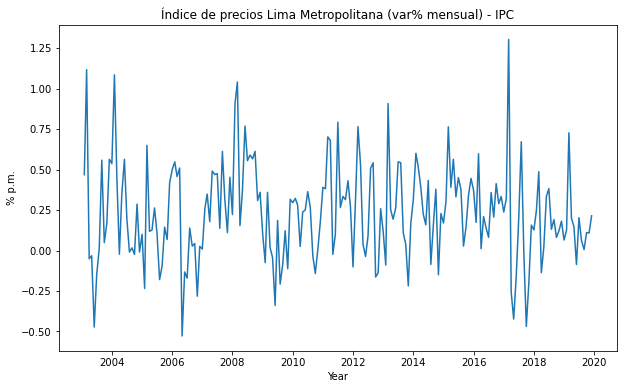

In [9]:
fig = plt.figure(figsize=(10, 6))
plt.plot(df1['Índice de precios Lima Metropolitana (var% mensual) - IPC'], label='PCI')
plt.title("Índice de precios Lima Metropolitana (var% mensual) - IPC")

plt.xlabel('Year')
plt.ylabel('% p.m.')


In [10]:
# Train and test samples

test_start = df1.index.get_loc('2018-01-01')
test_end = df1.index.get_loc('2019-12-01')

train = df1.iloc[:test_start]
test = df1.iloc[test_start:test_end+1]

In [11]:
y_hat = test.copy().drop('Índice de precios Lima Metropolitana (var% mensual) - IPC', axis=1)
y_hat['naive'] = train.iloc[len(train)-1, 0]

y_pred_rw = y_hat.iloc[:, 0]

Text(0, 0.5, '% p.m.')

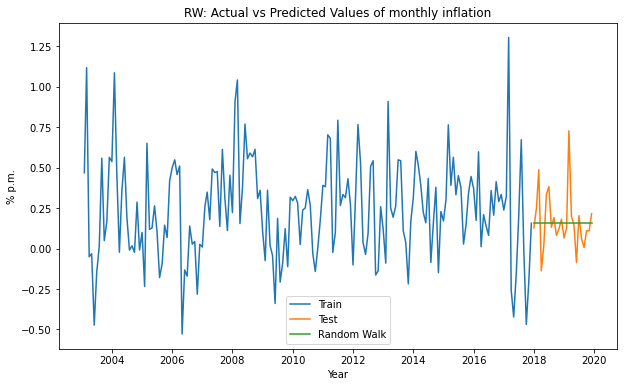

In [12]:
# Plot
fig = plt.figure(figsize=(10, 6))
plt.plot(train.index, train['Índice de precios Lima Metropolitana (var% mensual) - IPC'], label='Train')
plt.plot(test.index, test['Índice de precios Lima Metropolitana (var% mensual) - IPC'], label='Test')
plt.plot(y_hat.index, y_hat['naive'], label='Random Walk')
plt.title("RW: Actual vs Predicted Values of monthly inflation")
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('% p.m.')


In [13]:
# Calculate the RMSE
rmse_RW = np.sqrt(np.mean(np.square(y_hat['naive'] - test['Índice de precios Lima Metropolitana (var% mensual) - IPC'])))

print("RMSE:", rmse_RW)

RMSE: 0.17721749284047236


## VAR

In [14]:
df_aux = df2.loc[:, ['Tipo de cambio - TC Interbancario (S/ por US$) - Compra', 'Liquidez de las sociedades creadoras de depósito (fin de periodo) - Liquidez Total a Tipo de Cambio Constante (millones S/)']]
df_aux = np.log(df_aux).diff()

df_aux1 = pd.merge(df1, df_aux, left_index=True, right_index=True)

df_aux2 = df2.loc[:, ['Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía', 'Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía']]
df3 = pd.merge(df_aux1, df_aux2, left_index=True, right_index=True)
df3 = df3.dropna()
display(df3)

,Índice de precios Lima Metropolitana (var% mensual) - IPC,Tipo de cambio - TC Interbancario (S/ por US$) - Compra,Liquidez de las sociedades creadoras de depósito (fin de periodo) - Liquidez Total a Tipo de Cambio Constante (millones S/),Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía
Fecha,,,,,
2003-03-01,1.117780,-0.001822,0.010059,1.938313,0.357386
2003-04-01,-0.050857,-0.000235,-0.000702,0.264059,-0.265865
2003-05-01,-0.032025,-0.003325,-0.007457,0.055604,-0.139973
2003-06-01,-0.473129,0.004332,0.006308,0.045022,-0.923490
2003-07-01,-0.149217,-0.001972,0.021468,0.189392,-0.404464
...,...,...,...,...,...
2019-08-01,0.060977,-0.003413,0.003749,0.140292,-0.032190
2019-09-01,0.006383,0.014319,0.001307,0.006326,0.006450
2019-10-01,0.110725,-0.004017,0.008042,0.228356,-0.027688


In [15]:
#Definimos las funciones auxiliares

#Estimador MCO

def var_mco(df,p=4):
    
    # Find the size of the dataset
    T,K = df.shape

    # Auxiliary matrices
    Y_ = df.transpose()
    Z  = np.ones(T-p)

    for i_p in range(p):
        if i_p == 0:
            Y = Y_.iloc[:,p-i_p:T-i_p].values
        else:
            Y = np.vstack([Y, Y_.iloc[:,p-i_p:T-i_p].values])

    # Create matrix X
    for i_p in range(p):
        for i_k in range(K):
            Z = np.vstack([Z, Y_.iloc[i_k,p-1-i_p:-1-i_p].values])

    A_matrix    = np.dot( np.dot(Y,Z.T)   ,  np.linalg.inv(np.dot(Z,Z.T)) )
    A_intercept = A_matrix[:,0]
    A_coeff     = A_matrix[:,1::]
    
    # Covariance Matrices
    U_       = Y - np.dot(A_matrix,Z)
    Sigma_U  = np.dot(U_,U_.T)/(T-p-p*K-1)
    Sigma_ML = np.dot(U_,U_.T)/(T-p)
    
    return A_intercept, A_coeff, Sigma_U, Sigma_ML, U_, Z, K, T

#Funciones Impulso Respuesta Estructurales con Identificacion Recursive (Cholesky)
def FIR(A,Sigma,p,h,K):

    # Construir la matrix J como en las notas
    J = np.hstack([np.eye(K), np.zeros((K, K*(p-1)))])
    
    # Solo necesitamos la submatriz KxK de Sigma para la descomposicion '(B^{-1})
    Sig = Sigma[0:K,0:K]
    
    # FIR en el impacto i=0 (noten que usamos una identificacion de Cholesky - recursiva)
    B0inv = np.linalg.cholesky(Sig)
    FIR   = np.reshape(np.dot(np.dot(np.dot(J,np.linalg.matrix_power(A1,0)),J.T),B0inv).T,
                       (K*K,1))
    
    for i in range(1,h+1):
        FIR = np.hstack([FIR, 
                         np.reshape(np.dot(np.dot(np.dot(J,np.linalg.matrix_power(A,i)),J.T),B0inv).T,
                                    (K*K,1))])
    
    return FIR, B0inv

# Descomposición de la varianza del error de predicción
def MSPE(A,Sigma,K,p,h):
    # Construir la matrix J como en las notas
    J = np.hstack([np.eye(K), np.zeros((K, K*(p-1)))])

    # Solo necesitamos la submatriz KxK de Sigma para la descomposicion '(B^{-1})
    Sig = Sigma[0:K,0:K]

    # Obtenemos Psi
    Psi    = np.dot(np.dot(J,np.linalg.matrix_power(A,0)),J.T)
    Theta  = np.dot(Psi,np.linalg.cholesky(Sig)).T
    Theta2 = np.multiply(Theta,Theta)
    Theta3 = Theta2.copy()

    for i in range(1,h):
        Psi = np.dot(np.dot(J,np.linalg.matrix_power(A,i)),J.T)
        Theta  = np.dot(Psi,np.linalg.cholesky(Sig)).T
        Theta2 = np.multiply(Theta,Theta)
        Theta3 = Theta3 + Theta2.copy()
    
    Theta4 = np.sum(Theta3,axis=0)

    # Matrix for decomposition
    MSPE = np.zeros((K, K))
    for j in range(K):
        MSPE[j,:] = np.divide(Theta3[j,:],Theta4)*100
    
    return MSPE.T


In [16]:
# Numero maximo de lags a incluir
maxlag=12

# Tipo de estadistico a considerar
test = 'ssr_chi2test'

# Nombre de las variables
variables = ['IPC','Tipo de cambio', 'M3']

# Funcion que genera el test para todas las variables
def grangers_causation_matrix(data, variables, test=test, verbose=False):    

    df = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    
    for c in df.columns:
        for r in df.index:
            test_result = grangercausalitytests(data[[r, c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
            min_p_value = np.min(p_values)
            df.loc[r, c] = min_p_value
    df.columns = [var + '_x' for var in variables]
    df.index = [var + '_y' for var in variables]
    return df


In [17]:
grangers_causation_matrix(df3, variables = df3.columns) 

,Índice de precios Lima Metropolitana (var% mensual) - IPC_x,Tipo de cambio - TC Interbancario (S/ por US$) - Compra_x,Liquidez de las sociedades creadoras de depósito (fin de periodo) - Liquidez Total a Tipo de Cambio Constante (millones S/)_x,Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía_x,Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía_x
Índice de precios Lima Metropolitana (var% mensual) - IPC_y,1.0000,0.0455,0.0004,0.0019,0.0014
Tipo de cambio - TC Interbancario (S/ por US$) - Compra_y,0.2945,1.0000,0.2752,0.3503,0.5017
Liquidez de las sociedades creadoras de depósito (fin de periodo) - Liquidez Total a Tipo de Cambio Constante (millones S/)_y,0.0176,0.0256,1.0000,0.0000,0.1247
Índice de precios Lima Metropolitana (var% mensual) - IPC Sin Alimentos y Energía_y,0.0138,0.0270,0.0000,1.0000,0.0158
Índice de precios Lima Metropolitana (var% mensual) - IPC Alimentos y Energía_y,0.0744,0.0455,0.0025,0.0251,1.0000


In [ ]:
# Podemos evaluar los criterios de informacion para diversos valores de rezagos

p_max    = 12
model    = VAR(df3)
inf_crit = pd.DataFrame()

for i in range(0,p_max+1):
    result = model.fit(i)
    tempdf = pd.DataFrame({"Lag number": [i], "AIC": [result.aic], "HQIC": [result.hqic], "BIC": [result.bic]})
    inf_crit = pd.concat([inf_crit,tempdf])
        

inf_crit.set_index('Lag number',inplace=True)
inf_crit

De esta forma, hallamos el rezago que minimiza el criterio de información según cada criterio 
**AIC: 12, HQIC: 12, BIC: 12**


En este caso preferimos usar el **criterio de Schwarz (BIC)** porque penaliza más el agregar más variables

In [19]:
## Estimación del VAR en forma reducida ##

h_ = 12          # Horizonte máximo para las FIR
p_ = 12           # Orden de rezagos

# Estimar VAR por MCO (ver función en la sección 0.)
A0,A1,Sig,Sig_ML,U,Z,K,T = var_mco(df3,p=p_)

# FIR estructural (ver función en la sección 0.)
FIR0, B0 = FIR(A1,Sig,p_,h_,K)

In [20]:
# Descomposición de la varianza del error de predicción

mspe = MSPE(A=A1,Sigma=Sig,K=K,p=p_,h=h_)

In [21]:
pd.DataFrame(mspe)

,0,1,2,3,4
0,68.412552,5.869206,12.428482,4.998270,8.291490
1,5.622769,83.187925,4.497014,5.047823,1.644469
2,5.074610,7.217454,70.251657,9.562985,7.893294
3,24.057667,14.053684,5.639626,52.210697,4.038326
4,62.749737,5.520163,11.401596,11.505334,8.823170


In [ ]:
fct_periods = 24

# Train and test samples

test_start = df3.index.get_loc('2018-01-01')
test_end = df3.index.get_loc('2019-12-01')

y_df = df3.iloc[:test_start]
df_test = df3.iloc[test_start:test_end+1]


#El modelo VAR(4) en La section anterior

lag_order = 1
model = VAR(y_df)

model_fitted = model.fit(lag_order) # Estimamos un modelo con 1 rezago

#Obtenemos el input data para el forecast
fct_input = y_df.values[-lag_order:] #la muestra del training sample considerando los rezagos del VAR 
model_forecast = model_fitted.forecast(y=fct_input, steps=fct_periods) #Realizamos el forecast

#Ponemos en formato Pandas
df_fct = pd.DataFrame(model_forecast, index = df3.index[-fct_periods:], columns=df3.columns + '_fct')

In [23]:
# Create a Pandas Series with the predicted values and the original index
y_pred_svar = pd.Series(df_fct['Índice de precios Lima Metropolitana (var% mensual) - IPC' + '_fct'], index=df3.index)

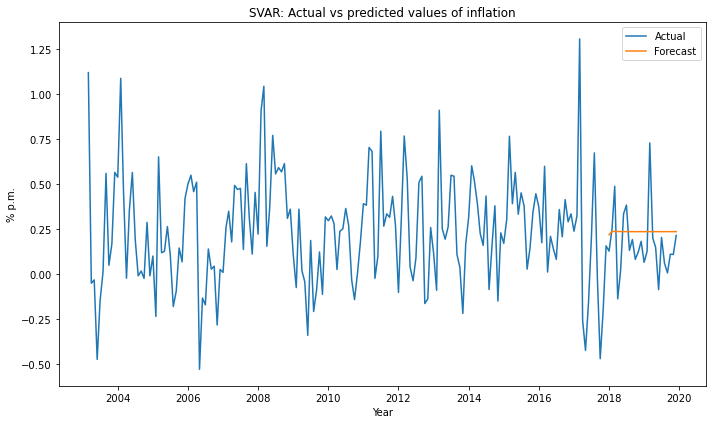

In [24]:
df_plot = pd.concat([df3, df_fct], axis=1)

# Plot
fig = plt.figure(figsize=(10, 6))

plt.plot(df_plot.index, df_plot['Índice de precios Lima Metropolitana (var% mensual) - IPC'], label='Actual')
plt.plot(df_fct.index, df_fct['Índice de precios Lima Metropolitana (var% mensual) - IPC' + '_fct'], label='Forecast')
plt.xlabel('Year')
plt.ylabel('% p.m.')
plt.title('SVAR: Actual vs predicted values of inflation')
plt.legend()

fig.tight_layout()


In [25]:
# Calculate the RMSE
mse = mean_squared_error(df_test['Índice de precios Lima Metropolitana (var% mensual) - IPC'], df_fct['Índice de precios Lima Metropolitana (var% mensual) - IPC' + '_fct'])
rmse_VAR = np.sqrt(mse)

print('RMSE:', rmse_VAR)

RMSE: 0.1885126171922719


# Machine learning

## EN

In [26]:
df4 = df2.dropna()

In [27]:
# Split data into input and inflation
X = df4.iloc[:, 1:]
y = df4.iloc[:, 0]

test_start = df4.index.get_loc('2018-01-01')
test_end = df4.index.get_loc('2019-12-01')

train = df4.iloc[:test_start]
test = df4.iloc[test_start:test_end+1]

X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# Standardize
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# EN model
enet = ElasticNet(alpha=0.1, l1_ratio=0.5)
enet.fit(X_train, y_train)
y_pred = enet.predict(X_test)

# Calculate the RMSR
rmse_EN = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE:', rmse_EN)

RMSE: 0.05663053249739441


In [28]:
y_pred_en = pd.Series(y_pred, index=test.index)

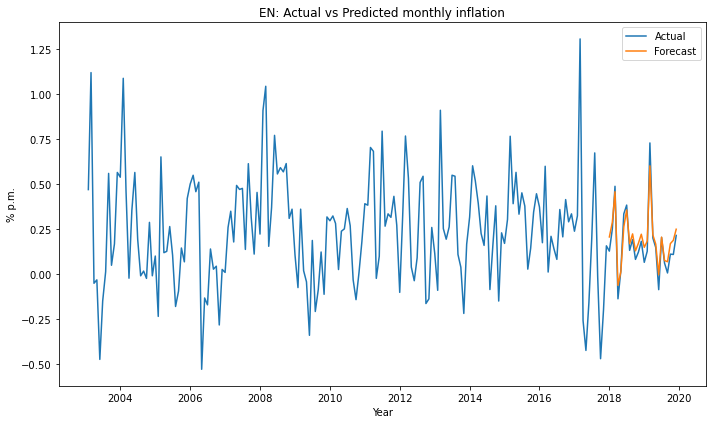

In [29]:
df_pred = pd.DataFrame({'Actual': y_test.values, 'Predicted': y_pred})
df_pred = df_pred.set_index(y_test.index)

fig = plt.figure(figsize=(10, 6))

plt.plot(df2.index, df2['Índice de precios Lima Metropolitana (var% mensual) - IPC'], label='Actual')
plt.plot(df_pred.index, df_pred['Predicted'], label='Forecast')
plt.legend()
plt.title('EN: Actual vs Predicted monthly inflation')
plt.xlabel('Year')
plt.ylabel('% p.m.')
fig.tight_layout()

## RF

In [30]:
df5 = df2.dropna()

In [31]:
#We want to predict the first variable (IPC)
X = df5.iloc[:, 1:]
y = df5.iloc[:, 0]

test_start = df5.index.get_loc('2018-01-01')
test_end = df5.index.get_loc('2019-12-01')

#
train = df5.iloc[:test_start]
test = df5.iloc[test_start:test_end+1]

X_train = train.iloc[:, 1:]
y_train = train.iloc[:, 0]
X_test = test.iloc[:, 1:]
y_test = test.iloc[:, 0]

# Train a RF model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)


In [32]:
y_pred_rf = pd.Series(y_pred, index=test.index)

In [33]:
# Calculate the RMSE
rmse_RF = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse_RF)

RMSE: 0.07547978219822984


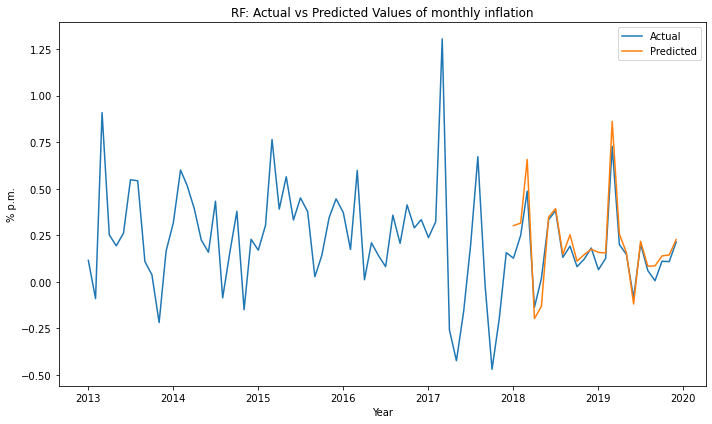

In [34]:
# Plot
fig = plt.figure(figsize=(10, 6))
plt.plot(df5.index, df5['Índice de precios Lima Metropolitana (var% mensual) - IPC'], label="Actual")
plt.plot(test.index, y_pred, label="Predicted")
plt.legend()
plt.xlabel('Year')
plt.ylabel('% p.m.')
plt.title("RF: Actual vs Predicted Values of monthly inflation")
fig.tight_layout()

#  RSME

In [35]:
data= [rmse_RW, rmse_VAR, rmse_EN, rmse_RF]
method= ['RW', 'VAR', 'EN', 'RF']

In [36]:
rmse = pd.DataFrame(data, index=method, columns=['RMSE'])
display(rmse)

,RMSE
RW,0.177217
VAR,0.188513
EN,0.056631
RF,0.075480


# Predicted values

In [37]:
#Actual values
PCI = df1.loc['2018-01-01':'2019-12-01', 'Índice de precios Lima Metropolitana (var% mensual) - IPC']

In [38]:
data = {
    'PCI': PCI,
    'RW': y_pred_rw,
    'SVAR': y_pred_svar,
    'EN': y_pred_en,
    'RF': y_pred_rf
}

df_pred = pd.DataFrame(data, index=test.index)
df_pred

,PCI,RW,SVAR,EN,RF
Fecha,,,,,
2018-01-01,0.127417,0.156852,0.218718,0.206160,0.301996
2018-02-01,0.250221,0.156852,0.235658,0.287211,0.315484
2018-03-01,0.487124,0.156852,0.236931,0.456922,0.657222
2018-04-01,-0.137073,0.156852,0.236413,-0.062314,-0.197139
2018-05-01,0.018455,0.156852,0.235969,0.012105,-0.131151
2018-06-01,0.334058,0.156852,0.235737,0.262042,0.347614
2018-07-01,0.382786,0.156852,0.235632,0.355777,0.393441
2018-08-01,0.131767,0.156852,0.235588,0.168240,0.147363
2018-09-01,0.191682,0.156852,0.235571,0.223007,0.252559


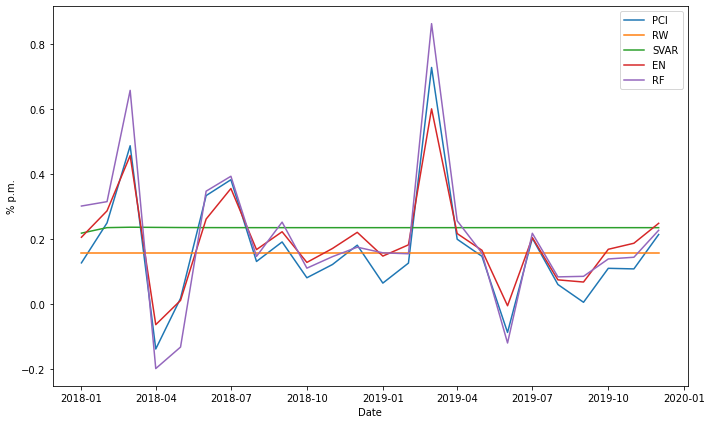

In [39]:
fig = plt.figure(figsize=(10, 6))

for col in df_pred.columns:
    plt.plot(df_pred.index, df_pred[col], label=col)

plt.legend(loc='best')
plt.xlabel('Date')
plt.ylabel('% p.m.')

fig.tight_layout()